## Task2. Cat vs Dog

directory 정의

In [1]:
import os, shutil

#최초 1번만 수행
original_data_dir='D:/deepdata/all_dogs_cats'
base_dir='D:/deepdata/dogs and cats_small1'# original_data_dir로부터 일부 데이터를 추출하여 base_dir에 저장하기 위해 만듬
#os.mkdir(base_dir)

train_dir=os.path.join(base_dir,'train')#dog_cats_small폴더내에 train폴더 생성
#os.mkdir(train_dir)

validation_dir=os.path.join(base_dir,'validation')#dog_cats_small폴더내에 validation폴더 생성
#os.mkdir(validation_dir)

test_dir=os.path.join(base_dir,'test')#dog_cats_small폴더내에 test폴더 생성
#os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')#train폴더내에 cats폴더 생성
#os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir,'dogs')#train폴더내에 dogs폴더 생성
#os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')#validation폴더내에 cats폴더 생성
#os.mkdir(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')#validation폴더내에 dogs폴더 생성
#os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cats')#test폴더내에 cats폴더 생성
#os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir,'dogs')#test폴더내에 dogs폴더 생성
#os.mkdir(test_dogs_dir)

In [2]:
print(len(os.listdir(train_cats_dir)));print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)));print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)));print(len(os.listdir(test_dogs_dir)))

1000
1000
500
500
500
500


### 1) Basic CNN model

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#255로 나눠서 객체화
train_datagen=ImageDataGenerator(rescale=1./255) 
test_datagen=ImageDataGenerator(rescale=1./255)

# flow_from_directory: directory data를 읽음 - cf) flow_from_dataframe 도 있음
# target size 조절, batch size 지정, class mode는 y data를 어떻게 바꿀지. sparse,none(=regression),...
# x:(20,150,150,3),y:(20,1) 로 generate 됨
train_generator=train_datagen.flow_from_directory(directory=train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(directory=validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


model

In [4]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras import models

cat_dog_model=models.Sequential()
#train_generator에서 target_size=(150,150)으로 하였고 color_mode의 default는 'rgb'이므로 input_shape=(150,150,3)으로 지정함
cat_dog_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Conv2D(64,(3,3),activation='relu'))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Conv2D(128,(3,3),activation='relu'))
cat_dog_model.add(MaxPooling2D(2,2))
cat_dog_model.add(Flatten())
cat_dog_model.add(Dense(512,activation='relu'))
cat_dog_model.add(Dense(1,activation='sigmoid'))
cat_dog_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

compile, fit

In [5]:
from tensorflow.keras import optimizers
opt=optimizers.RMSprop(lr=1e-4)
cat_dog_model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['acc'])
cat_dog_result = cat_dog_model.fit_generator(
    train_generator,steps_per_epoch=50,epochs=10,
    validation_data=validation_generator,validation_steps=50 )

D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
50/50 [==============================] - 96s 2s/step - loss: 0.7314 - acc: 0.5153 - val_loss: 0.7130 - val_acc: 0.5000
Epoch 2/10
50/50 [==============================] - 71s 1s/step - loss: 0.6727 - acc: 0.5920 - val_loss: 0.6493 - val_acc: 0.6140
Epoch 3/10
50/50 [==============================] - 73s 1s/step - loss: 0.6398 - acc: 0.6296 - val_loss: 0.6196 - val_acc: 0.6720
Epoch 4/10
50/50 [==============================] - 74s 1s/step - loss: 0.5974 - acc: 0.6729 - val_loss: 0.6469 - val_acc: 0.6310
Epoch 5/10
50/50 [==============================] - 77s 2s/step - loss: 0.5652 - acc: 0.7201 - val_loss: 0.6138 - val_acc: 0.6690
Epoch 6/10
50/50 [==============================] - 74s 1s/step - loss: 0.5423 - acc: 0.7249 - val_loss: 0.6339 - val_acc: 0.6440
Epoch 7/10
50/50 [==============================] - 71s 1s/step - loss: 0.5216 - acc: 0.7412 - val_loss: 0.5917 - val_acc: 0.6740
Epoch 8/10
50/50 [==============================] - 73s 1s/step - loss: 0.4920 - acc: 0.76

graph

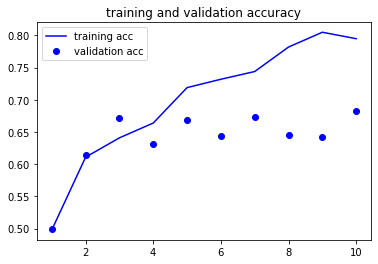

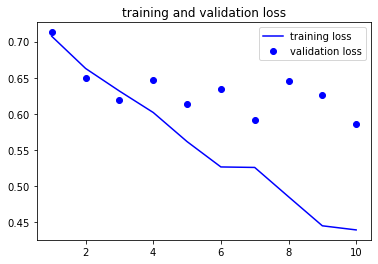

In [6]:
import matplotlib.pyplot as plt
acc=cat_dog_result.history['acc']
val_acc=cat_dog_result.history['val_acc']
loss=cat_dog_result.history['loss']
val_loss=cat_dog_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

evaluate

In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')
loss, acc=cat_dog_model.evaluate(test_generator,steps=50)
print(loss)
print(acc)

Found 1000 images belonging to 2 classes.


D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.5843579769134521
0.6830000281333923


* 해당 모델에서 train loss는 0에 수렴해 가지만 validation loss는 일부 증가하고 noise가 큰 것으로 보아 과대적합이 발생하고 있음을 알 수 있다.  
* 이는 매우 큰 수의 모수를 단 2000여개의 표본으로 학습했기 때문이다.
* 다음에서는 train data를 늘려서 overfitting을 줄여본다.

### 2) Image 를 늘려서 적용
* overfitting을 해결하는 방법 중 하나는 데이터의 크기를 늘리는 것이다. 
* 그 수단으로 ImageDataGenerator를 사용해 train data를 rorate, shift, shear, flip 시켜 data의 size를 늘려 본다.

data

In [28]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=30, width_shift_range=0.2,
                               height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255) #validation data는 그대로

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


model

In [29]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout
from tensorflow.keras import models

aug_model=models.Sequential()
aug_model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Conv2D(64,(3,3),activation='relu'))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Conv2D(128,(3,3),activation='relu'))
aug_model.add(MaxPooling2D(2,2))
aug_model.add(Flatten())
aug_model.add(Dropout(0.5))
aug_model.add(Dense(512,activation='relu'))
aug_model.add(Dense(1,activation='sigmoid'))
aug_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36992)            

compile, fit

In [30]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
callback_list = [EarlyStopping(monitor='acc',patience=3)]

aug_model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
aug_result = aug_model.fit_generator(
    train_generator,steps_per_epoch=62,epochs=30,
    validation_data=validation_generator,validation_steps=31,callbacks=callback_list)

Epoch 1/30
62/62 [==============================] - 149s 2s/step - loss: 0.8331 - acc: 0.4987 - val_loss: 0.6879 - val_acc: 0.5353
Epoch 2/30
62/62 [==============================] - 103s 2s/step - loss: 0.6840 - acc: 0.5551 - val_loss: 0.6628 - val_acc: 0.5887
Epoch 3/30
62/62 [==============================] - 138s 2s/step - loss: 0.6672 - acc: 0.5875 - val_loss: 0.6548 - val_acc: 0.6048
Epoch 4/30
62/62 [==============================] - 136s 2s/step - loss: 0.6634 - acc: 0.6062 - val_loss: 0.6580 - val_acc: 0.5817
Epoch 5/30
62/62 [==============================] - 114s 2s/step - loss: 0.6441 - acc: 0.6027 - val_loss: 0.6253 - val_acc: 0.6300
Epoch 6/30
62/62 [==============================] - 87s 1s/step - loss: 0.6317 - acc: 0.6347 - val_loss: 0.6007 - val_acc: 0.6734
Epoch 7/30
62/62 [==============================] - 76s 1s/step - loss: 0.6172 - acc: 0.6412 - val_loss: 0.6951 - val_acc: 0.5877
Epoch 8/30
62/62 [==============================] - 76s 1s/step - loss: 0.6259 - acc:

graph

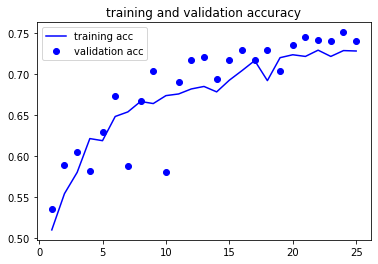

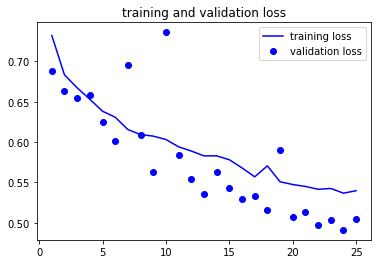

In [31]:
import matplotlib.pyplot as plt
acc=aug_result.history['acc']
val_acc=aug_result.history['val_acc']
loss=aug_result.history['loss']
val_loss=aug_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

test_datagen 을 통해 evaluate

In [32]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')
loss, acc=aug_model.evaluate(test_generator,steps=50)
print(loss)
print(acc)

Found 1000 images belonging to 2 classes.
0.5543972253799438
0.7210000157356262


* 자료증대를 적용하지 않았을 때와 비교해, 자료증대를 적용했을 때 
    * train data와 validaton data의 loss가 같이 감소하고, validaton loss가 train loss보다 작은 양상을 유지하는 것으로 보아 overfitting 은 어느정도 해결되었 고, accuracy는 조금 증가했다. (0.68  ->0.71) 
    * 하지만 아직 noise가 크다. 
* 다음에는 모수 초기치 부여, 규제화 적용, batchnormalization, dropout 의 기법을 종합적으로 적용해 정확도를 높이고 noise를 줄여본다. 

### 3) Image Augmentation + 모수 초기치 부여, 규제화 적용, batchnormalization, dropout 의 기법
model2

In [33]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout,BatchNormalization
from tensorflow.keras import models

aug_model2=models.Sequential()
aug_model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3),kernel_initializer='he_normal'))
aug_model2.add(BatchNormalization(momentum=0.9)) #batchnorm
aug_model2.add(MaxPooling2D(2,2))
aug_model2.add(Dropout(0.3))

aug_model2.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal'))
aug_model2.add(BatchNormalization(momentum=0.9)) #batchnorm
aug_model2.add(MaxPooling2D(2,2))
aug_model2.add(Dropout(0.3))

aug_model2.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal'))
aug_model2.add(BatchNormalization(momentum=0.9)) #batchnorm
aug_model2.add(MaxPooling2D(2,2))
aug_model2.add(Dropout(0.3))

aug_model2.add(Flatten())
aug_model2.add(Dropout(0.3))
aug_model2.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
aug_model2.add(Dense(1,activation='sigmoid',kernel_regularizer='l1'))
aug_model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)       

compile, fit

In [34]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
callback_list = [EarlyStopping(monitor='acc',patience=3)]

aug_model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
aug_result2 = aug_model2.fit_generator(
    train_generator,steps_per_epoch=62,epochs=40,
    validation_data=validation_generator,validation_steps=31,callbacks=callback_list)

Epoch 1/40
62/62 [==============================] - 143s 2s/step - loss: 3.2603 - acc: 0.5191 - val_loss: 1.1415 - val_acc: 0.6069
Epoch 2/40
62/62 [==============================] - 140s 2s/step - loss: 1.0111 - acc: 0.5782 - val_loss: 1.1413 - val_acc: 0.6028
Epoch 3/40
62/62 [==============================] - 151s 2s/step - loss: 0.9524 - acc: 0.6125 - val_loss: 1.1140 - val_acc: 0.6341
Epoch 4/40
62/62 [==============================] - 155s 2s/step - loss: 0.9173 - acc: 0.6163 - val_loss: 1.0681 - val_acc: 0.6391
Epoch 5/40
62/62 [==============================] - 149s 2s/step - loss: 0.8864 - acc: 0.6232 - val_loss: 0.9930 - val_acc: 0.6714
Epoch 6/40
62/62 [==============================] - 143s 2s/step - loss: 0.8534 - acc: 0.6407 - val_loss: 0.9797 - val_acc: 0.6583
Epoch 7/40
62/62 [==============================] - 142s 2s/step - loss: 0.8191 - acc: 0.6574 - val_loss: 0.9747 - val_acc: 0.6875
Epoch 8/40
62/62 [==============================] - 148s 2s/step - loss: 0.7963 - a

graph

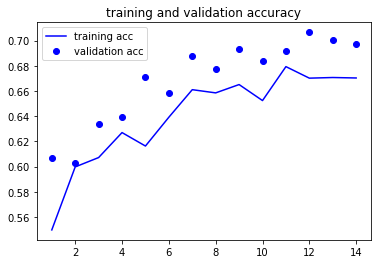

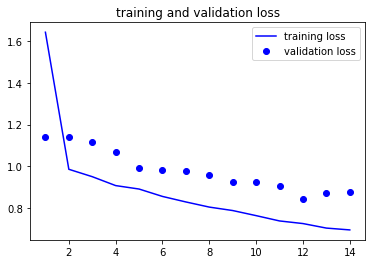

In [35]:
import matplotlib.pyplot as plt
acc=aug_result2.history['acc']
val_acc=aug_result2.history['val_acc']
loss=aug_result2.history['loss']
val_loss=aug_result2.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

test_datagen 을 통해 evaluate

In [36]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')
loss, acc=aug_model2.evaluate_generator(test_generator,steps=50)
print(loss)
print(acc)

Found 1000 images belonging to 2 classes.
0.8969117999076843
0.6899999976158142


 herefixhere#

### 4) Fine Tuning을 적용
* 이미 천사백만개 모수가 train 되어있는 vgg model 의 출력층과 함께 vgg model의 일부 층을 다시 학습한다.
* 위에서 과대적합 개선과 성능 개선에 효과가 있었던 자료증대도 함께 사용한다.        

load vgg weight

In [5]:
from tensorflow.keras.applications import VGG16
vgg_base=VGG16(weights='imagenet',include_top=False, input_shape=(150,150,3))
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

data

In [6]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#경로 지정
base_dir='D:/deepdata/dogs and cats_small'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test') 

model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_fine = Sequential()
model_fine.add(vgg_base) #vgg 모델
model_fine.add(Flatten())
model_fine.add(Dense(256,activation='relu'))
model_fine.add(Dense(1,activation='sigmoid'))
model_fine.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [40]:
vgg_base.trainable=True #True로 풀어줌.
trainable_layer=False #변수

for layer in vgg_base.layers: #vgg의 ayer하나하나를 읽음
    if layer.name=='block5_conv1': # block5_conv1부터 trainable_layer가 True로 layer.trainable이 True로 바뀜
        trainable_layer=True 
        #False를 True로 바꿈. 한번 True로 걸리면 그 뒤에 층들은 다 trainable=True임
    if trainable_layer:
        layer.trainable=True
    else:
        layer.trainable=False

Image Data Generator

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40, width_shift_range=0.2,
                               height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                horizontal_flip=True, fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255) #검증데이터는 자료증대를 하지 않아야 함.

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')
validation_generator=validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),
                                              batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


compile, fit

In [42]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

callback_list = [EarlyStopping(monitor='acc',patience=3)]

model_fine.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
model_fine_result=model_fine.fit_generator(
    train_generator,steps_per_epoch=62, epochs=40, 
    validation_data=validation_generator,validation_steps=31,callbacks=callback_list)

Epoch 1/40
62/62 [==============================] - 482s 8s/step - loss: 0.5703 - acc: 0.7089 - val_loss: 0.2797 - val_acc: 0.8810
Epoch 2/40
62/62 [==============================] - 640s 10s/step - loss: 0.3565 - acc: 0.8403 - val_loss: 0.2357 - val_acc: 0.9042
Epoch 3/40
62/62 [==============================] - 642s 10s/step - loss: 0.2865 - acc: 0.8866 - val_loss: 0.2396 - val_acc: 0.8962
Epoch 4/40
62/62 [==============================] - 415s 7s/step - loss: 0.2665 - acc: 0.8921 - val_loss: 0.2452 - val_acc: 0.8931
Epoch 5/40
62/62 [==============================] - 371s 6s/step - loss: 0.2587 - acc: 0.8885 - val_loss: 0.2629 - val_acc: 0.8861
Epoch 6/40
62/62 [==============================] - 361s 6s/step - loss: 0.2487 - acc: 0.8916 - val_loss: 0.2150 - val_acc: 0.9093
Epoch 7/40
62/62 [==============================] - 361s 6s/step - loss: 0.2505 - acc: 0.8990 - val_loss: 0.1702 - val_acc: 0.9234
Epoch 8/40
62/62 [==============================] - 365s 6s/step - loss: 0.2076 -

graph

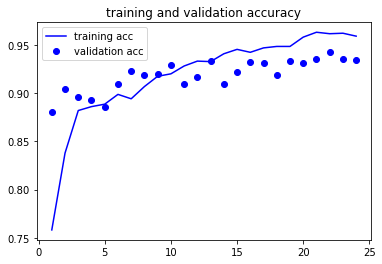

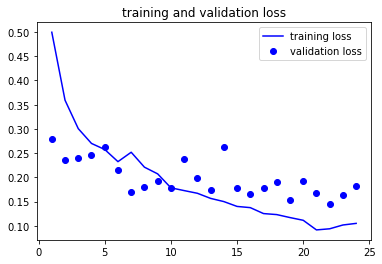

In [43]:
import matplotlib.pyplot as plt
acc=model_fine_result.history['acc']
val_acc=model_fine_result.history['val_acc']
loss=model_fine_result.history['loss']
val_loss=model_fine_result.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

evaluate

In [44]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')
loss, acc=model_fine.evaluate(test_generator,steps=50)
print(loss)
print(acc)

Found 1000 images belonging to 2 classes.
0.22150923311710358
0.9409999847412109


### 5) Fine Tuning + Image Augmentation + 모수 초기치 부여, 규제화 적용, batchnormalization, dropout 의 기법

model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization,Dropout

model_fine2 = Sequential()
model_fine2.add(vgg_base) #vgg 모델
model_fine2.add(Flatten())
model_fine2.add(Dense(256,activation='relu',kernel_initializer='he_normal')) #he initializer
model_fine2.add(BatchNormalization(momentum=0.9)) #batchnorm
model_fine2.add(Dropout(0.5)) #dropout
model_fine2.add(Dense(1,activation='sigmoid',kernel_regularizer='l1')) #L1 norm
model_fine2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,813,377
Trainable params: 16,812,865
Non-trainable params: 512
________________________________________

In [11]:
vgg_base.trainable=True #True로 풀어줌.
trainable_layer=False #변수

for layer in vgg_base.layers: #vgg의 ayer하나하나를 읽음
    if layer.name=='block5_conv1': # block5_conv1부터 trainable_layer가 True로 layer.trainable이 True로 바뀜
        trainable_layer=True 
        #False를 True로 바꿈. 한번 True로 걸리면 그 뒤에 층들은 다 trainable=True임
    if trainable_layer:
        layer.trainable=True
    else:
        layer.trainable=False

compile, fit

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

callback_list = [EarlyStopping(monitor='acc',patience=3)]

model_fine2.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
model_fine_result2 = model_fine2.fit_generator(
                                train_generator,steps_per_epoch=62, epochs=40, 
                                validation_data=validation_generator,validation_steps=31,callbacks=callback_list)

D:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
62/62 [==============================] - 448s 7s/step - loss: 0.9624 - acc: 0.6230 - val_loss: 0.5261 - val_acc: 0.8569
Epoch 2/40
62/62 [==============================] - 460s 7s/step - loss: 0.7363 - acc: 0.7555 - val_loss: 0.4627 - val_acc: 0.8831
Epoch 3/40
62/62 [==============================] - 621s 10s/step - loss: 0.6070 - acc: 0.8311 - val_loss: 0.4292 - val_acc: 0.9073
Epoch 4/40
62/62 [==============================] - 381s 6s/step - loss: 0.5922 - acc: 0.8434 - val_loss: 0.4084 - val_acc: 0.9214
Epoch 5/40
62/62 [==============================] - 373s 6s/step - loss: 0.5411 - acc: 0.8626 - val_loss: 0.4074 - val_acc: 0.9113
Epoch 6/40
62/62 [==============================] - 380s 6s/step - loss: 0.5210 - acc: 0.8630 - val_loss: 0.4034 - val_acc: 0.9133
Epoch 7/40
62/62 [==============================] - 524s 9s/step - loss: 0.4901 - acc: 0.8739 - val_loss: 0.3871 - val_acc: 0.9244
Epoch 8/40
62/62 [==============================] - 719s 12s/step - loss: 0.4808 -

graph

In [ ]:
import matplotlib.pyplot as plt
acc=model_fine_result2.history['acc']
val_acc=model_fine_result2.history['val_acc']
loss=model_fine_result2.history['loss']
val_loss=model_fine_result2.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

evaluate

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),
                                              batch_size=20, class_mode='binary')
loss, acc=model_fine2.evaluate(test_generator,steps=50)
print(loss)
print(acc)